**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [26]:
dataset = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')

**A look at first five rows**

In [16]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


**See the number of rows and columns in our dataset**

In [4]:
dataset.shape

(180519, 53)

**A look at last five rows of dataset**

In [14]:
dataset.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [15]:
dataset['Product Description'].unique()

array([nan])

In [16]:
dataset['Product Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46])

In [18]:
dataset['Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46])

In [27]:
# changing shipment date column name
dataset['date_of_orders'] = dataset['shipping date (DateOrders)']

In [3]:
data=dataset.drop(columns = ['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
                             'Customer Lname','Customer Zipcode','Latitude','Longitude','Product Description','Product Image',
                             'Order Zipcode','shipping date (DateOrders)','Order Profit Per Order', 'Product Category Id', 'Order Customer Id',
                          'Order Item Cardprod Id', 'Order Item Product Price', 'Sales per customer','Order Id','Order Item Id','Category Id','Customer Id',
                          'Product Card Id','Department Id'])

In [11]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Region', 'Order State', 'Order Status',
       'Product Name', 'Product Price', 'Shipping Mode'],
      dtype='object')

In [56]:
data.shape

(180519, 29)

In [34]:
data['Customer Segment'].value_counts()

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

In [21]:
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [24]:
data.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,Shipping Mode
180514,CASH,4,4,40.000000,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,...,1,399.980011,399.980011,Eastern Asia,Shanghái,CLOSED,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class
180515,DEBIT,3,2,-613.770019,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,...,1,399.980011,395.980011,Eastern Asia,Osaka,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class
180516,TRANSFER,5,4,141.110001,Late delivery,1,45,Fishing,Bristol,EE. UU.,...,1,399.980011,391.980011,Oceania,Australia del Sur,PENDING,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class
180517,PAYMENT,3,4,186.229996,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,...,1,399.980011,387.980011,Oceania,Australia del Sur,PENDING_PAYMENT,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class
180518,PAYMENT,4,4,168.949997,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,...,1,399.980011,383.980011,South Asia,Tamil Nadu,PENDING_PAYMENT,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class


****

**EXPLORATORY DATA ANALYSIS**

Correlation between numerical characters

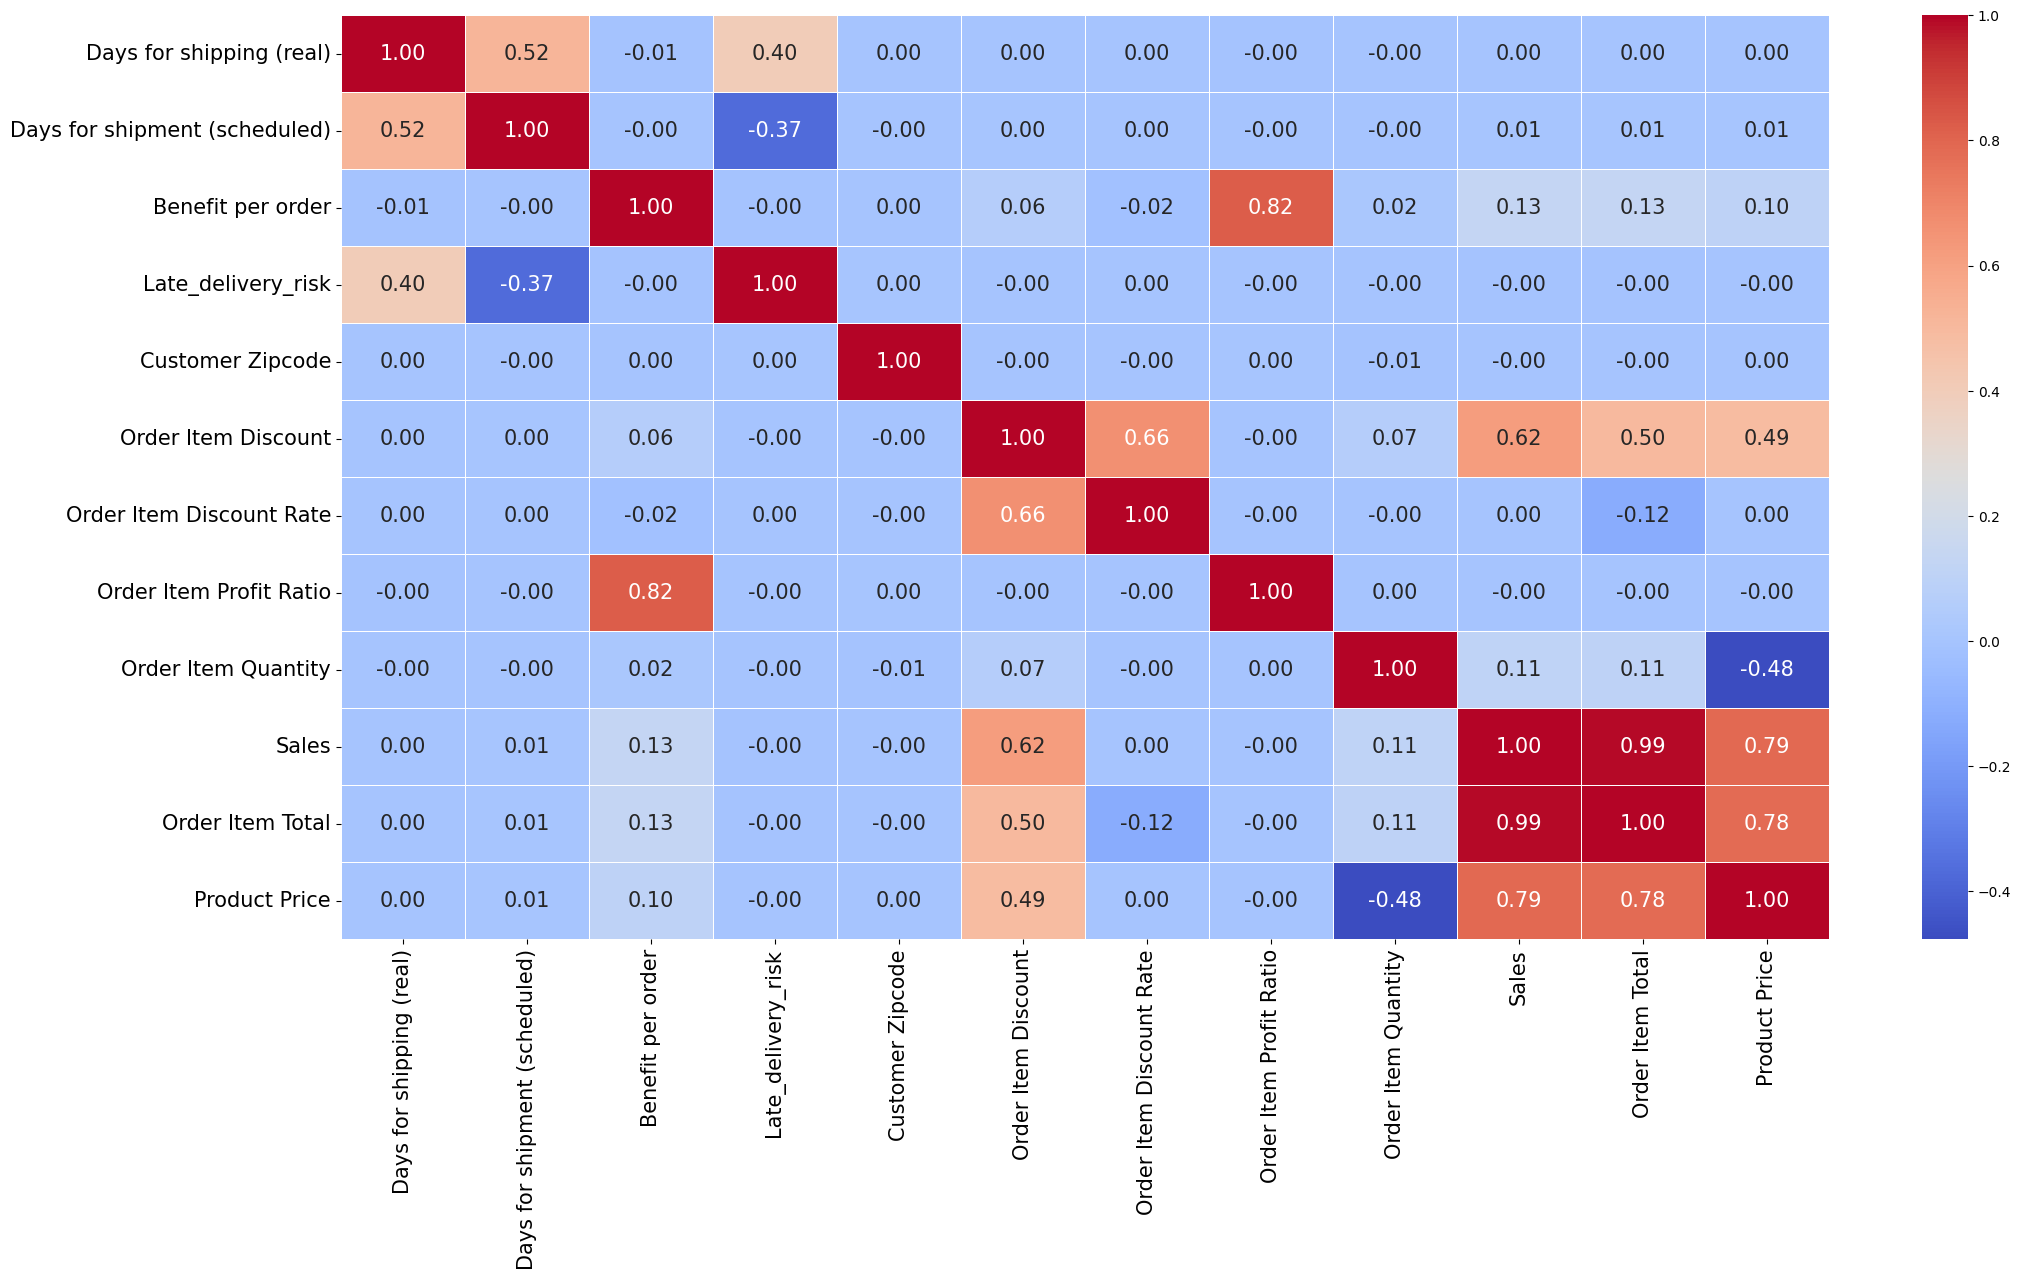

In [62]:
fig, ax = plt.subplots(figsize=(24,12))
c = data.corr()
heatmap = sns.heatmap(c, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 15})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
plt.show()

###There is a strong correlation (0.79) between Sales per product (Sales) and Price of the product (Price) in the correlation heatmap, also(.99) between order item total and sales.


### The features we are interested in are
1. Data for shipping
2. Late delivery risk
3. Sales
4. Benefit per order
5. Delivery status
6. Order Status

In [25]:
data['Order Item Total'].value_counts().sum()

180519

Let us have a look at 'Delivery Status' grouped by 'Customer Segment'

<Axes: xlabel='Delivery Status', ylabel='count'>

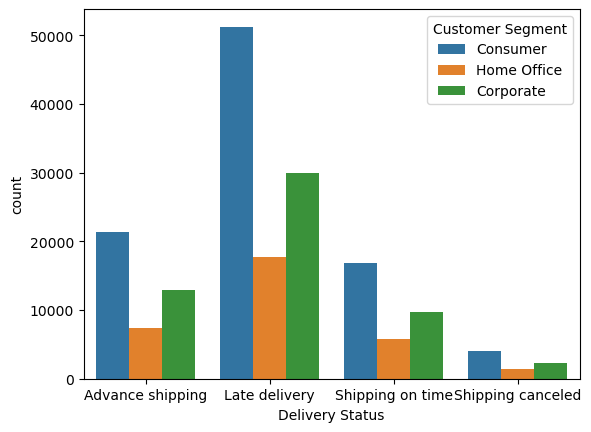

In [10]:
sns.countplot(x='Delivery Status',data=data,hue = 'Customer Segment')

### Sales by continent and region

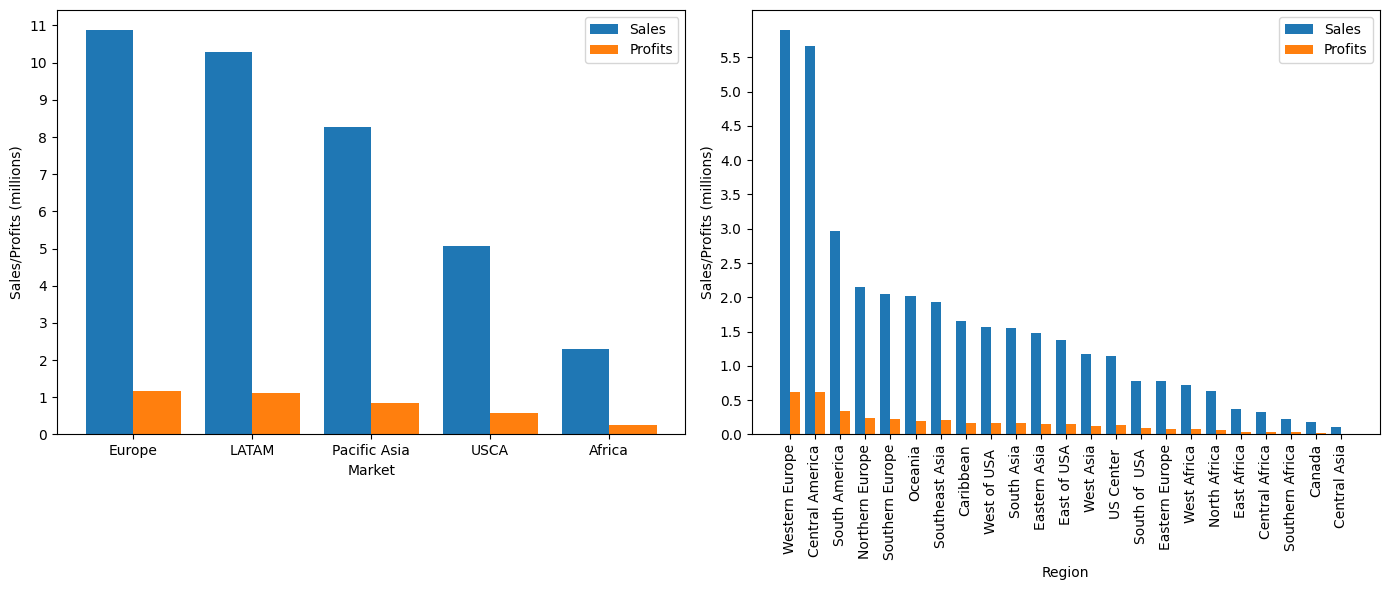

In [8]:
# Data
market = data.groupby('Market')
region = data.groupby('Order Region')
# Sales and Profits by Market plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
markets = market['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(markets))
bar_width = 0.4
ax1.bar(ticks, market['Sales'].sum().reindex(markets), width=bar_width, label='Sales')
ax1.bar(ticks+bar_width, market['Benefit per order'].sum().reindex(markets), width=bar_width, label='Profits')
ax1.set(label='Sale and Profit by Market', xlabel='Market', ylabel='Sales/Profits (millions)', xticks=ticks+bar_width/2,
        xticklabels=markets, yticks=np.arange(0, 12e6, 1e6), yticklabels=np.arange(0, 12, 1))
ax1.legend()
# Sales and Profits by Region plot
regions = region['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(regions))
bar_width = 0.4
ax2.bar(ticks, region['Sales'].sum().reindex(regions), width=bar_width, label='Sales')
ax2.bar(ticks+bar_width, region['Benefit per order'].sum().reindex(regions), width=bar_width, label='Profits')
ax2.set(label='Sale and Profit by Region', xlabel='Region', ylabel='Sales/Profits (millions)', xticks=ticks+bar_width/2,
        yticks=np.arange(0, 6e6, 0.5e6), yticklabels=np.arange(0, 6, 0.5))
ax2.set_xticklabels(regions, rotation=90)
ax2.legend()

plt.legend()
plt.tight_layout()
plt.show()

### It can be seen from the graph that European market has the most number of sales followed by Latin America whereas Africa has the least. In these markets western europe regions and central america recorded highest sales

### Sales by Product Category

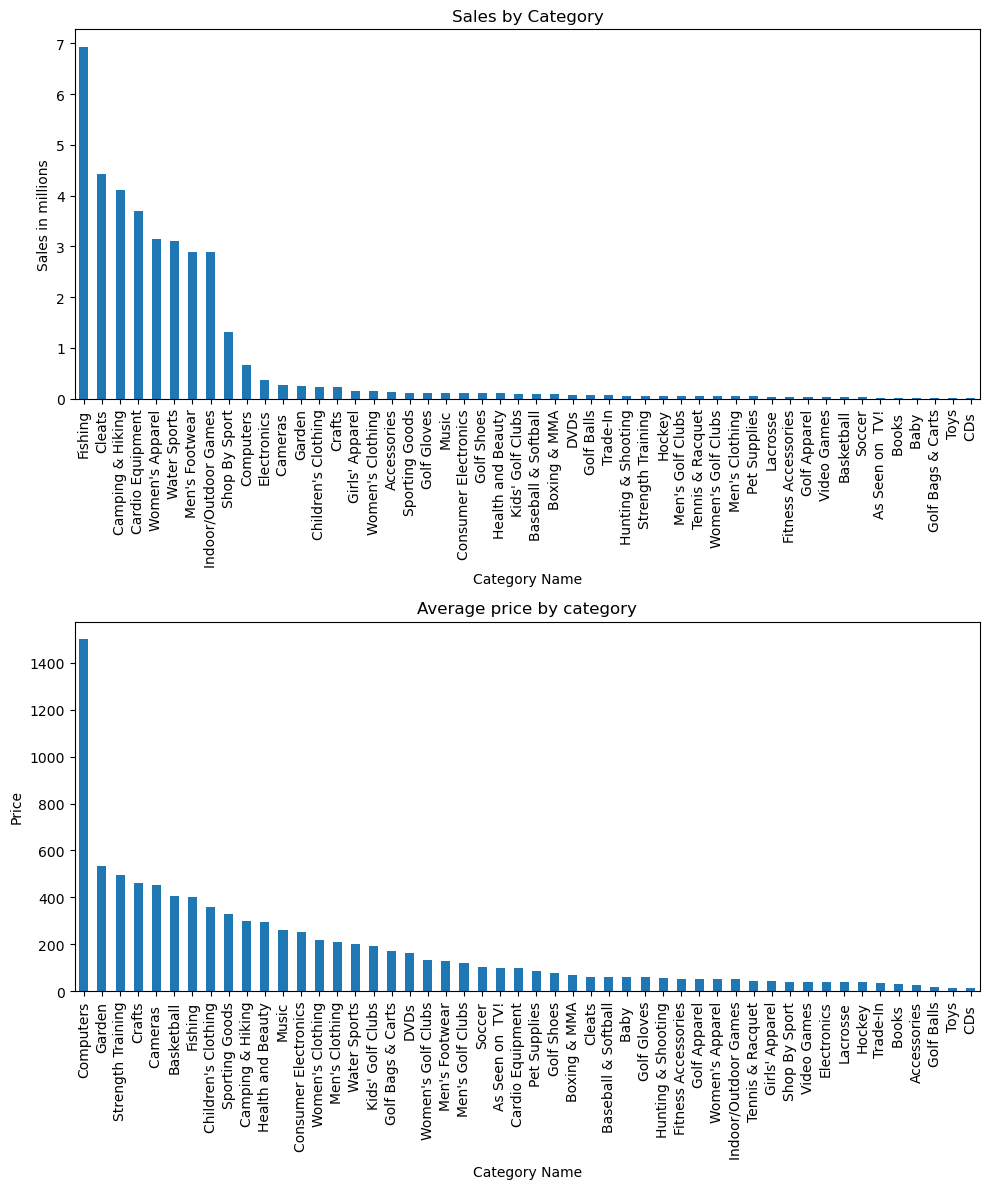

In [8]:
cat = data.groupby('Category Name')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
# Total sum of sales for all categories
cat['Sales'].sum().sort_values(ascending=False).plot.bar(ax=ax1)
ax1.set(title="Sales by Category", ylabel='Sales in millions', yticks=np.arange(0, 8e6, 1e6), yticklabels=np.arange(0, 8, 1))
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(ax=ax2)
ax2.set(title="Average price by category", ylabel='Price')
plt.tight_layout()
plt.show()

####  Fishing category had most number of sales followed by the Cleats.
#### As for the average product prices, Computers leads the numbers followed by Garden equipment.

#### FREQUENCY OF LATE SHIPMENTS

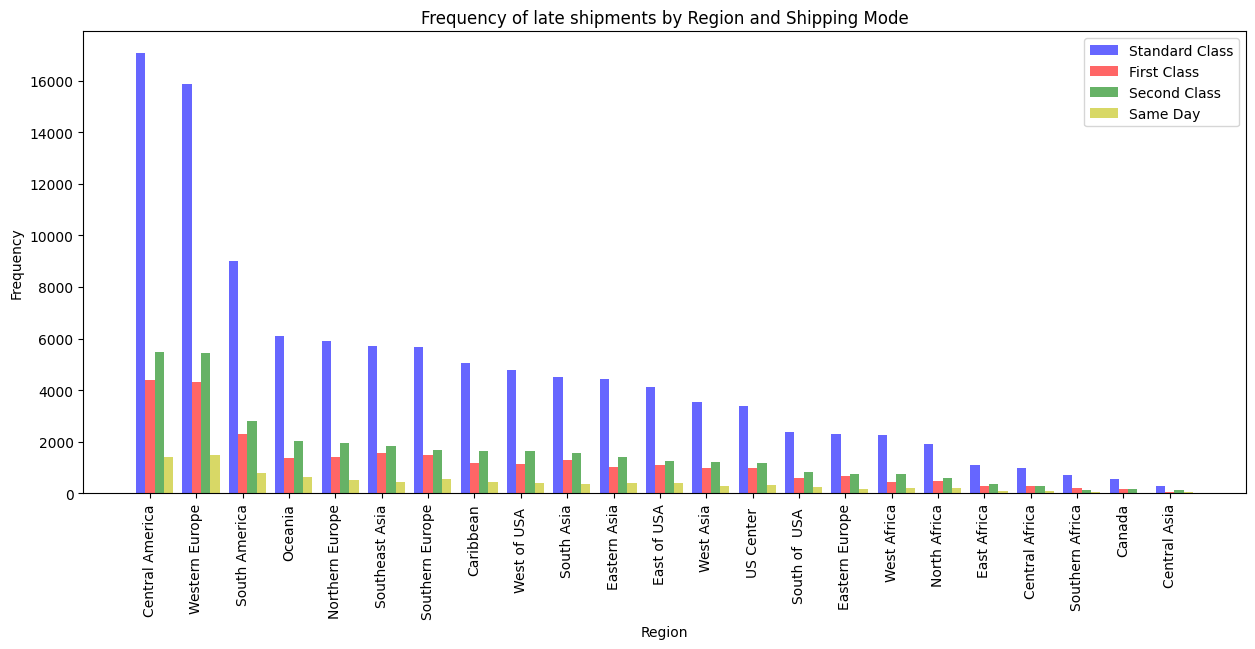

In [65]:
index = data.groupby('Order Region').count()['Sales'].sort_values(ascending=False).index
ticks = np.arange(len(index))

ship_data = data.groupby(['Shipping Mode', 'Order Region']).count()['Sales']
bar_width=0.2
opacity=0.6

# Plotting late deliveries by Shipping mode and region
fig,ax = plt.subplots(figsize=(15,6))
ax.bar(ticks, ship_data['Standard Class'].reindex(index), bar_width, alpha=opacity, color='b',
       label='Standard Class')
ax.bar(ticks+bar_width, ship_data['First Class'].reindex(index), bar_width, alpha=opacity, color='r',
       label='First Class')
ax.bar(ticks+2*bar_width, ship_data['Second Class'].reindex(index), bar_width, alpha=opacity, color='g',
       label='Second Class')
ax.bar(ticks+3*bar_width, ship_data['Same Day'].reindex(index), bar_width, alpha=opacity, color='y',
       label='Same Day')
ax.set(title='Frequency of late shipments by Region and Shipping Mode', xlabel='Region', ylabel='Frequency',
      xticks=ticks+bar_width)
ax.set_xticklabels(index, rotation=90)
ax.legend()
plt.show()

**The maximum number of late deliveries is in Standard Shipping mode followed Second class and First Class which are close in terms of late deliveries.**

**The least late deliveries are for Same Day mode. We can see that the costlier the delivery method, the higher the chance of on-time delivery.**


**As for the regions, Central America has the highest late deliveries followed by Western Europe.**

#### We observed a strong correlation (0.79) between Sales per product (Sales) and Price of the product (Price) in the correlation heatmap.
Lets look at that correlation.

[Text(0.5, 1.0, 'Product Price vs Sales'),
 Text(0.5, 0, 'Product Price'),
 Text(0, 0.5, 'Sales')]

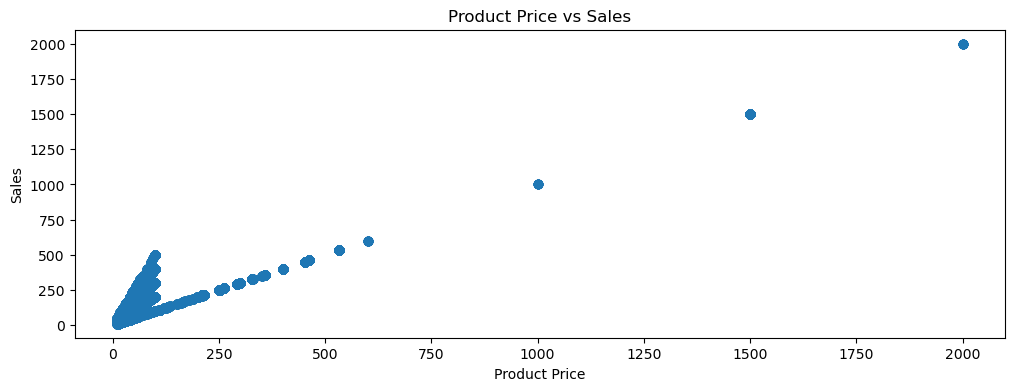

In [31]:
fig, ax = plt.subplots(1,figsize=(12, 4))
plt.scatter(x=data['Product Price'], y=data['Sales'])
ax.set(title='Product Price vs Sales', xlabel='Product Price', ylabel='Sales')

### the buying pattern of the customers vs average sale, orders are most for economic items

# PROFIT

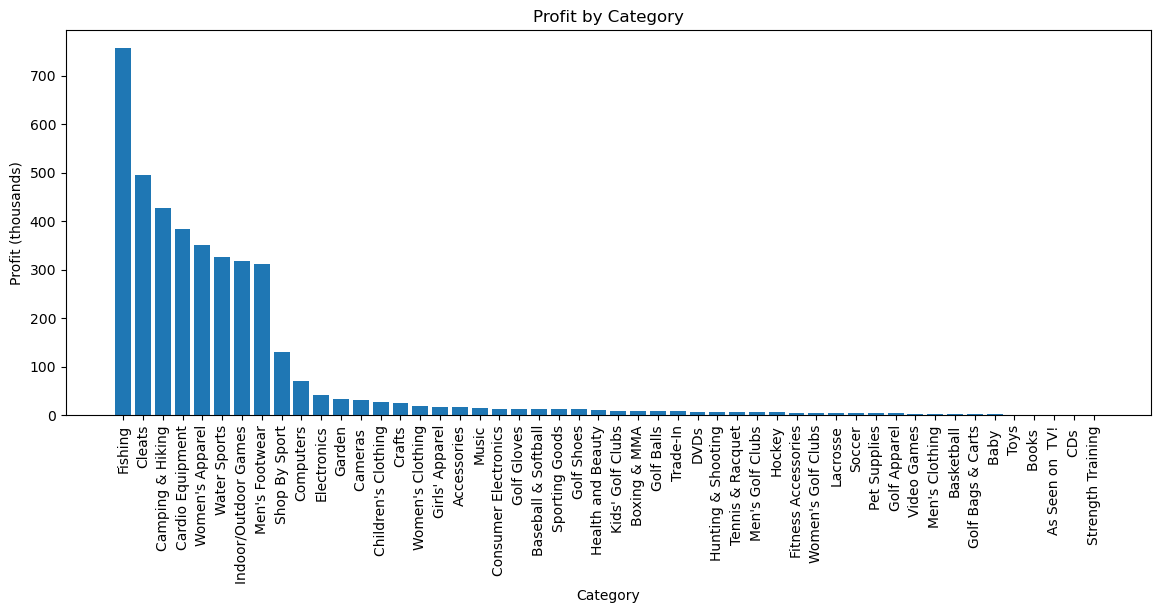

In [32]:
profit_cat = data.groupby('Category Name')['Benefit per order'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(len(profit_cat)), profit_cat)
ax.set(title='Profit by Category', xlabel='Category', ylabel='Profit (thousands)', yticklabels=np.arange(0, 800, 100),
      xticks=np.arange(len(profit_cat)))
ax.set_xticklabels(profit_cat.index, rotation=90)
plt.show()

#### Fishing gives maximum profit followed by cleats 

# LOSS

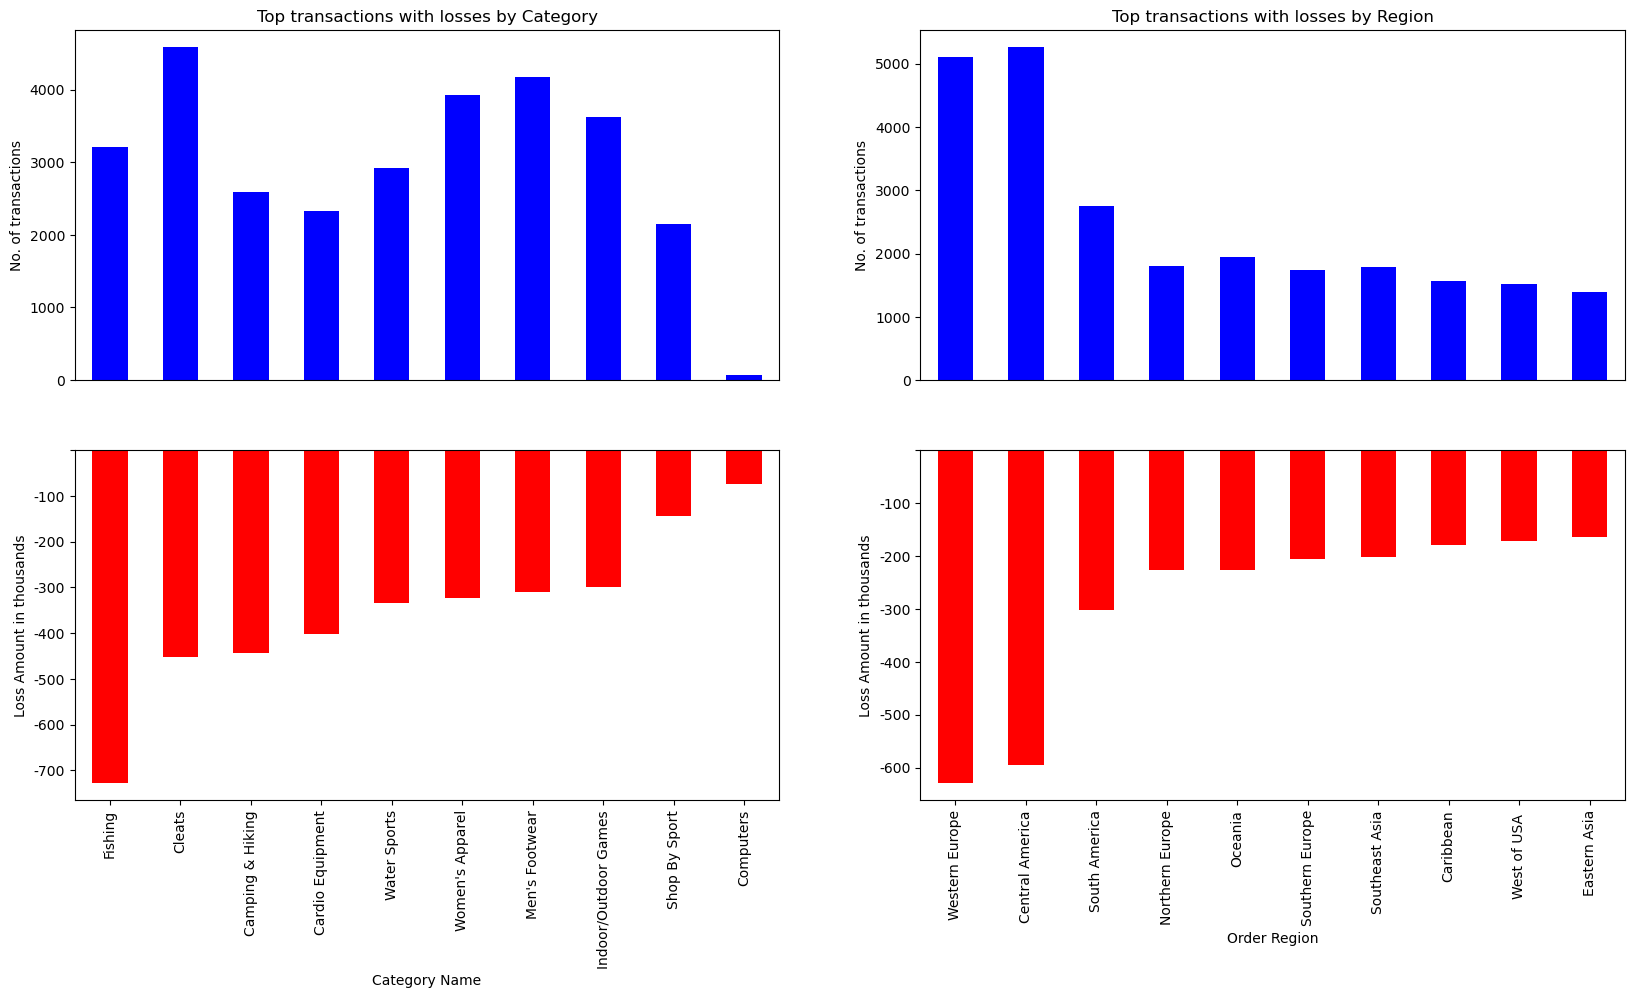

In [42]:
loss = data[data['Benefit per order']<0]

#Plotting top 10 products with most loss
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flat
max_loss_cat = loss.groupby('Category Name').sum()['Benefit per order'].nsmallest(10)
loss['Category Name'].value_counts()[max_loss_cat.index].plot.bar(ax=axs[0], color='b')
max_loss_cat.plot.bar(ax=axs[2], color='r')
axs[0].set(title='Top transactions with losses by Category', ylabel='No. of transactions')
axs[0].xaxis.set_visible(False)
axs[2].set(ylabel='Loss Amount in thousands', yticklabels=np.arange(-800, 0, 100))

# Plotting top 10 Regions with max losses
max_loss_reg = loss.groupby('Order Region').sum()['Benefit per order'].nsmallest(10)
loss['Order Region'].value_counts()[max_loss_reg.index].plot.bar(ax=axs[1], color='b')
max_loss_reg.plot.bar(ax=axs[3], color='r')
axs[1].set(title='Top transactions with losses by Region', ylabel='No. of transactions')
axs[1].xaxis.set_visible(False)
axs[3].set(ylabel='Loss Amount in thousands', yticklabels=np.arange(-700, 0, 100))
plt.show()

#### It can be seen that Cleats is the category with maximum frequency of loss generating transactions followed by Mens footwear.
Fishing records the highest amount lost in loss generating transactions, few while ago we saw that fishing contributes to maximum profit.
Most lost sales are happeing in Western Europe & Central America region.

### Products being delivered late 

<Axes: title={'center': 'Top 10 products with most late deliveries'}>

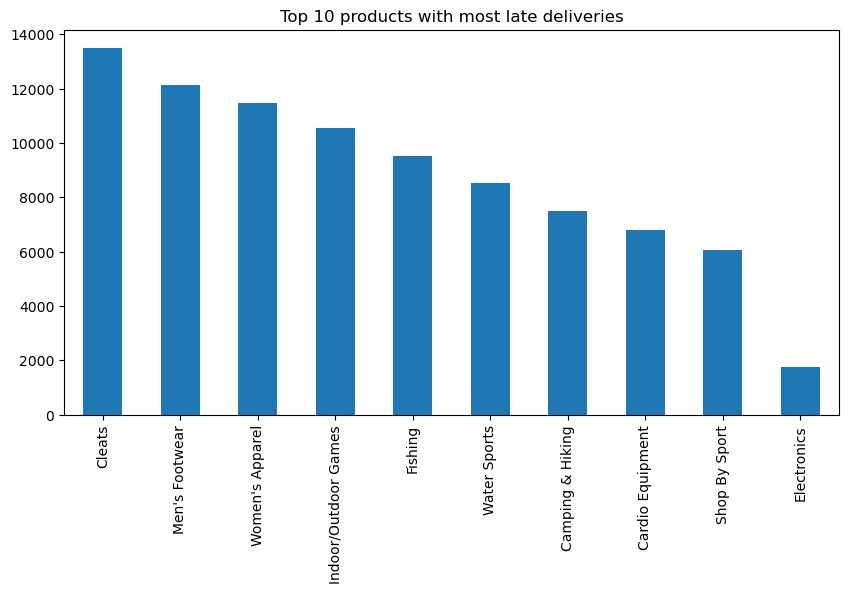

In [37]:
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(10,5), 
                                                                title=('Top 10 products with most late deliveries'))

### 'Cleats' have most late deliveries whereas 'Electronics' have least late deliveries

# PREPROCESSING

In [10]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### 1. CHECK FOR NULL VALUES

In [5]:
dataset.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


#### We see null values in 'Customer Zipcode','Customer Lname','Order Zipcode' and 'Product Description'.

#### 1. BOXPLOT TO DETECT OUTLIERS

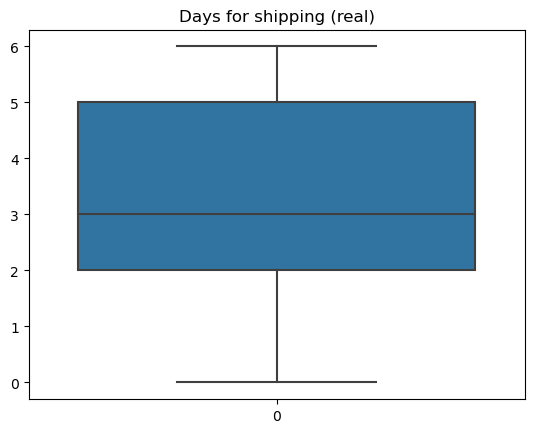

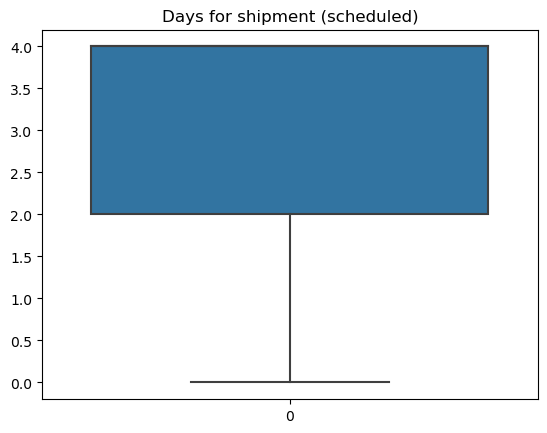

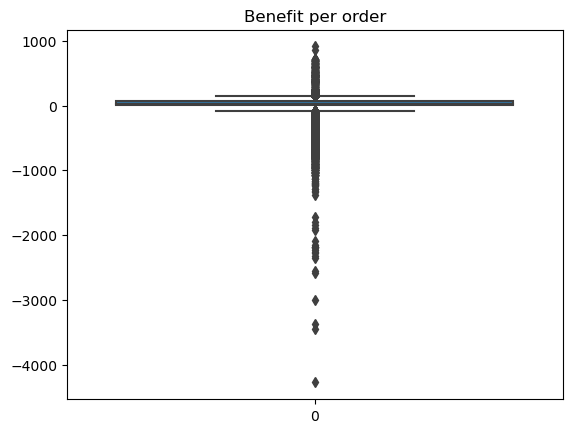

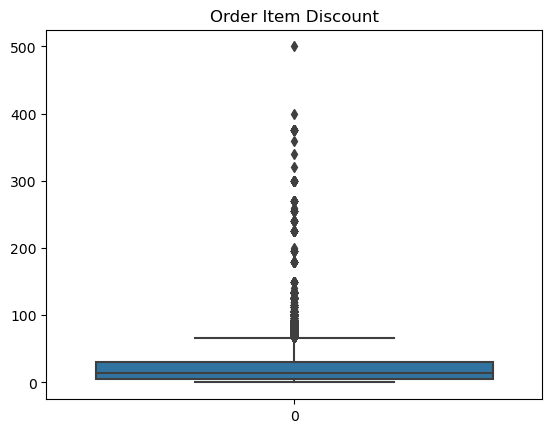

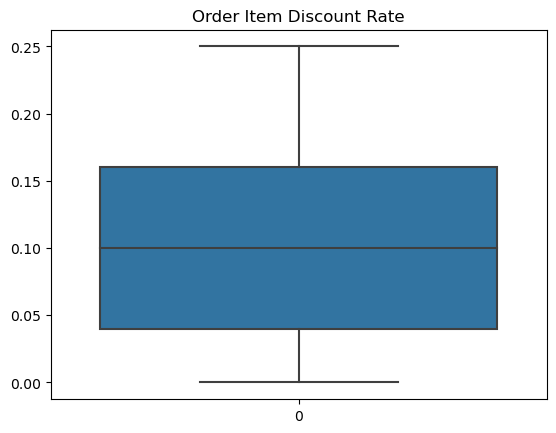

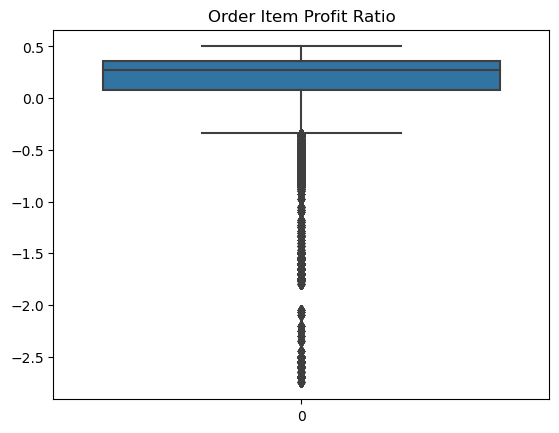

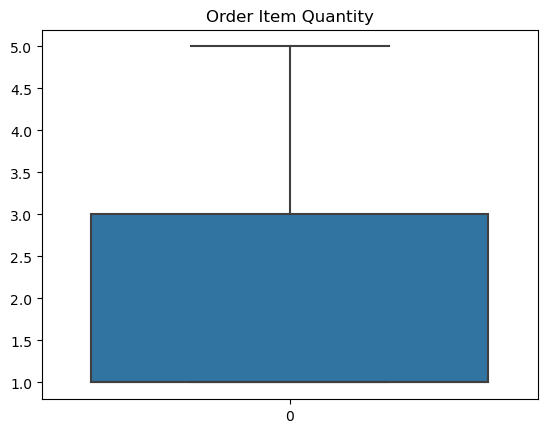

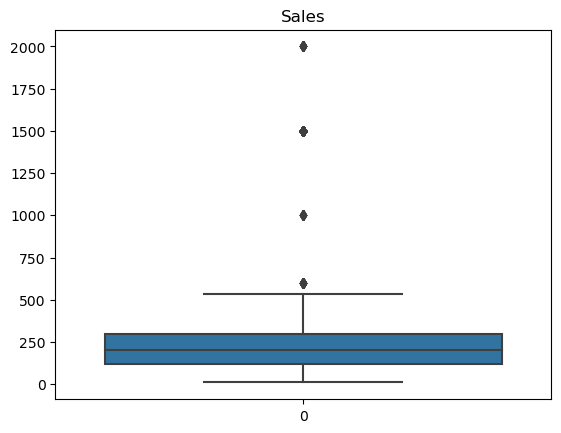

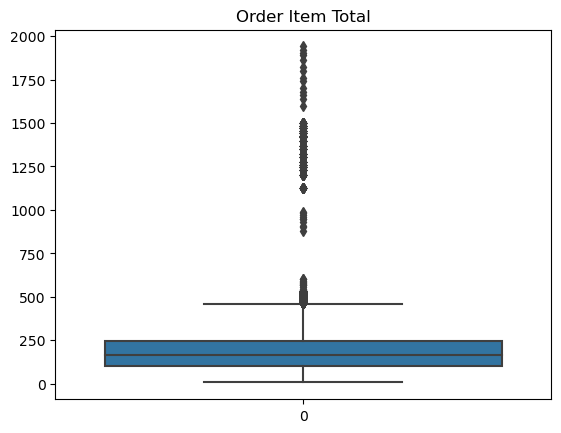

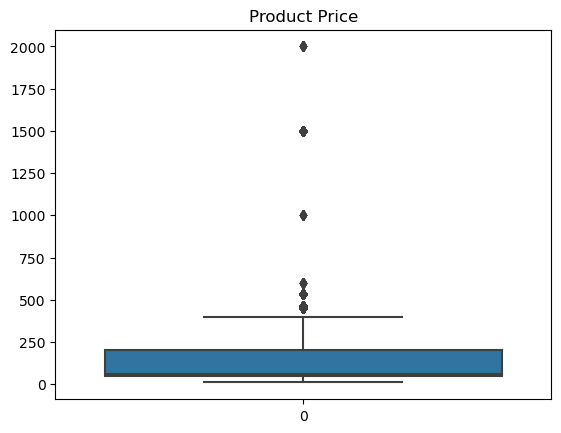

In [4]:

for i in [ 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total']:
    sns.boxplot( data[i])
    plt.title(i)
    plt.show()
    

In [9]:
dataset[['Order Item Product Price','Sales','Product Price'][:10]]

,Order Item Product Price,Sales,Product Price
0,327.750000,327.750000,327.750000
1,327.750000,327.750000,327.750000
2,327.750000,327.750000,327.750000
3,327.750000,327.750000,327.750000
4,327.750000,327.750000,327.750000
...,...,...,...
180514,399.980011,399.980011,399.980011
180515,399.980011,399.980011,399.980011
180516,399.980011,399.980011,399.980011
180517,399.980011,399.980011,399.980011


In [17]:
dataset[['Order Item Product Price','Sales','Product Price']].value_counts()

Order Item Product Price  Sales       Product Price
129.990005                129.990005  129.990005       22372
399.980011                399.980011  399.980011       17325
199.990005                199.990005  199.990005       15622
299.980011                299.980011  299.980011       13729
59.990002                 179.970001  59.990002         5016
                                                       ...  
999.989990                999.989990  999.989990          10
99.000000                 99.000000   99.000000            9
80.000000                 400.000000  80.000000            9
99.000000                 396.000000  99.000000            9
                          198.000000  99.000000            9
Length: 203, dtype: int64

In [16]:
dataset[['Sales per customer','Order Item Total']]

,Sales per customer,Order Item Total
0,314.640015,314.640015
1,311.359985,311.359985
2,309.720001,309.720001
3,304.809998,304.809998
4,298.250000,298.250000
...,...,...
180514,399.980011,399.980011
180515,395.980011,395.980011
180516,391.980011,391.980011
180517,387.980011,387.980011


In [18]:
dataset[['Sales per customer','Order Item Total']].value_counts()

Sales per customer  Order Item Total
122.839996          122.839996          1264
109.190002          109.190002          1247
120.889999          120.889999          1243
116.989998          116.989998          1243
127.389999          127.389999          1243
                                        ... 
232.800003          232.800003             1
335.829987          335.829987             1
334.359985          334.359985             1
331.829987          331.829987             1
1939.989990         1939.989990            1
Length: 2927, dtype: int64

In [14]:
dataset[['Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity','Order Item Total']]

,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total
0,13.110000,0.04,0.29,1,314.640015
1,16.389999,0.05,-0.80,1,311.359985
2,18.030001,0.06,-0.80,1,309.720001
3,22.940001,0.07,0.08,1,304.809998
4,29.500000,0.09,0.45,1,298.250000
...,...,...,...,...,...
180514,0.000000,0.00,0.10,1,399.980011
180515,4.000000,0.01,-1.55,1,395.980011
180516,8.000000,0.02,0.36,1,391.980011
180517,12.000000,0.03,0.48,1,387.980011


In [12]:
dataset['Order Item Quantity'].max()

5

In [26]:
dataset[['Order Profit Per Order','Benefit per order']]

,Order Profit Per Order,Benefit per order
0,91.250000,91.250000
1,-249.089996,-249.089996
2,-247.779999,-247.779999
3,22.860001,22.860001
4,134.210007,134.210007
...,...,...
180514,40.000000,40.000000
180515,-613.770019,-613.770019
180516,141.110001,141.110001
180517,186.229996,186.229996


In [27]:
dataset[['Order Profit Per Order','Benefit per order']].value_counts()

Order Profit Per Order  Benefit per order
 0.000000                0.000000            1177
 143.990005              143.990005           199
 72.000000               72.000000            194
 46.799999               46.799999            188
 24.000000               24.000000            181
                                             ... 
-67.050003              -67.050003              1
-66.970001              -66.970001              1
-66.959999              -66.959999              1
-66.940002              -66.940002              1
 911.799988              911.799988             1
Length: 21998, dtype: int64

In [28]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,DEBIT,3,4,91.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,...,0.29,1,327.75,314.640015,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class
1,TRANSFER,5,4,-249.089996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,...,-0.80,1,327.75,311.359985,South Asia,Rajastán,PENDING,Smart watch,327.75,Standard Class
2,CASH,4,4,-247.779999,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,...,-0.80,1,327.75,309.720001,South Asia,Rajastán,CLOSED,Smart watch,327.75,Standard Class
3,DEBIT,3,4,22.860001,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,...,0.08,1,327.75,304.809998,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class
4,PAYMENT,2,4,134.210007,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,...,0.45,1,327.75,298.250000,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Segment               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Department Name                180519 non-null  object 
 12  Market                        

In [31]:
object_columns = data.select_dtypes(include='object').columns.tolist()
object_columns

['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode']

In [34]:
dataset[['shipping date (DateOrders)','order date (DateOrders)']]

,shipping date (DateOrders),order date (DateOrders)
0,2/3/2018 22:56,1/31/2018 22:56
1,1/18/2018 12:27,1/13/2018 12:27
2,1/17/2018 12:06,1/13/2018 12:06
3,1/16/2018 11:45,1/13/2018 11:45
4,1/15/2018 11:24,1/13/2018 11:24
...,...,...
180514,1/20/2016 3:40,1/16/2016 3:40
180515,1/19/2016 1:34,1/16/2016 1:34
180516,1/20/2016 21:00,1/15/2016 21:00
180517,1/18/2016 20:18,1/15/2016 20:18


In [35]:
data['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [4]:
data['Order City'].value_counts()

Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Libourne            1
Bergerac            1
Juliaca             1
Takasaki            1
Pernik              1
Name: Order City, Length: 3597, dtype: int64

## FEATURE ENGINEERING

In [31]:
# convert date to month,day and hour
data['timestamp'] = pd.to_datetime(dataset['date_of_orders'])

# Extract day, month, and hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['hour'] = data['timestamp'].dt.hour
data['year'] = data['timestamp'].dt.year

In [32]:
data[['day','month','hour','year']]

,day,month,hour,year
0,3,2,22,2018
1,18,1,12,2018
2,17,1,12,2018
3,16,1,11,2018
4,15,1,11,2018
...,...,...,...,...
180514,20,1,3,2016
180515,19,1,1,2016
180516,20,1,21,2016
180517,18,1,20,2016


<Axes: xlabel='day', ylabel='count'>

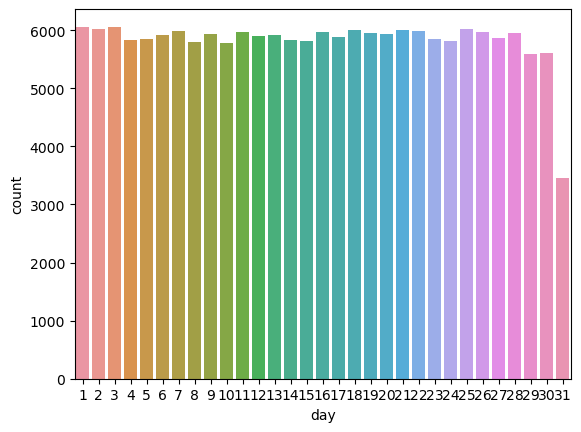

In [18]:
sns.countplot(x='day',data=data)

<Axes: xlabel='month', ylabel='count'>

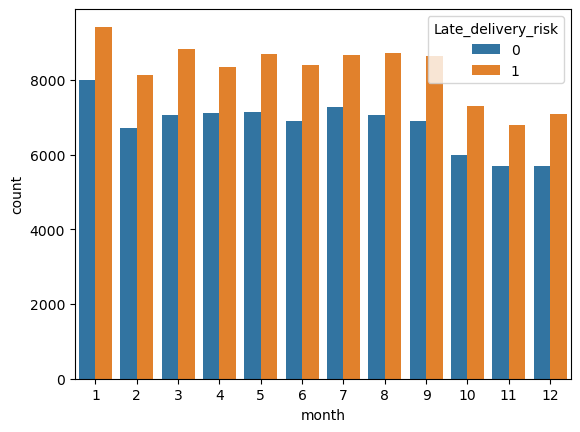

In [33]:
sns.countplot(x='month',data=data,hue='Late_delivery_risk')

<Axes: xlabel='year', ylabel='count'>

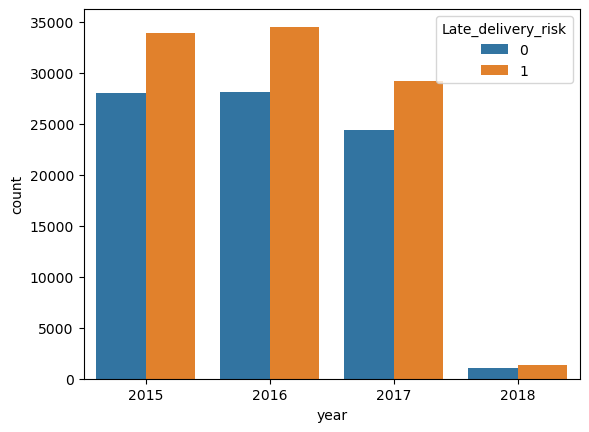

In [34]:
sns.countplot(x='year',data=data,hue = 'Late_delivery_risk')

<Axes: xlabel='hour', ylabel='count'>

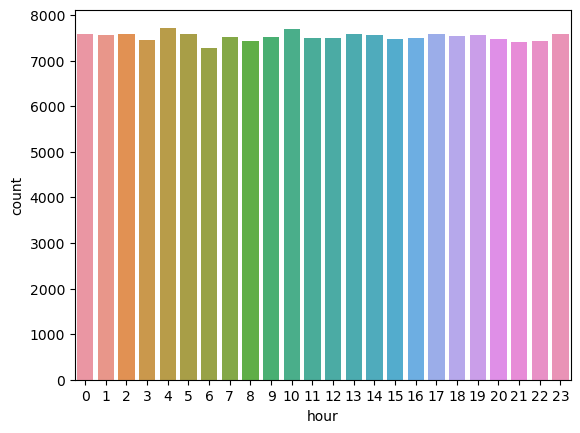

In [21]:
sns.countplot(x='hour',data=data)

#### Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for i in ['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode']:

    data[i]  =  le.fit_transform(data[i])

In [42]:
data['distance'] = data['Order City']-data['Customer City']
data['distance']

0          265
1          325
2          -61
3         2941
4         3160
          ... 
180514    2863
180515    1336
180516     -30
180517     -41
180518    2137
Name: distance, Length: 180519, dtype: int32

#### Creating the target column 'Is_Late'

In [43]:
dataset['Is_Late'] = np.where(dataset['Days for shipping (real)'] > dataset['Days for shipment (scheduled)'], 1, 0)

In [44]:
dataset['Is_Late'].value_counts()

1    103400
0     77119
Name: Is_Late, dtype: int64

In [46]:
dataset['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64